In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data Cleaning ---
# Load the raw CSV data
# Website https://data360.worldbank.org/en/indicator/IMF_FAS_FCMIBT?view=trend

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IMF_FAS_FCMIBT.csv')

To access files from your Google Drive in Colab, you need to mount your Google Drive first. You can do this by running the following code:

Once your Google Drive is mounted, you can access your files using the path `/content/drive/My Drive/`.

After mounting, you will need to update the file path in the code cell to `/content/drive/My Drive/IMF_FAS_FCMIBT.csv`.

In [ ]:
# Display the first few rows
print("First 5 rows of the DataFrame:")
display(df.head())

# Check data types
print("\nData types of each column:")
display(df.info())

# Check for missing values
print("\nMissing values per column:")
display(df.isnull().sum())

First 5 rows of the DataFrame:


,STRUCTURE,STRUCTURE_ID,ACTION,FREQ_ID,FREQ_NAME,REF_AREA_ID,REF_AREA_NAME,INDICATOR_ID,INDICATOR_NAME,SEX_ID,...,UNIT_MULT_NAME,UNIT_TYPE_ID,UNIT_TYPE_NAME,TIME_FORMAT_ID,TIME_FORMAT_NAME,COMMENT_OBS,OBS_STATUS_ID,OBS_STATUS_NAME,OBS_CONF_ID,OBS_CONF_NAME
0,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,AFG,Afghanistan,IMF_FAS_FCMIBT,"Use of Financial Services, Mobile and internet...",_Z,...,Units,NUMBER,Number (real number),P1Y,Annual,NaN,A,Normal value,PU,Public
1,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,AFG,Afghanistan,IMF_FAS_FCMIBT,"Use of Financial Services, Mobile and internet...",_Z,...,Units,NUMBER,Number (real number),P1Y,Annual,NaN,A,Normal value,PU,Public
2,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,AFG,Afghanistan,IMF_FAS_FCMIBT,"Use of Financial Services, Mobile and internet...",_Z,...,Millions,CUR,Currency,P1Y,Annual,NaN,A,Normal value,PU,Public
3,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,AFG,Afghanistan,IMF_FAS_FCMIBT,"Use of Financial Services, Mobile and internet...",_Z,...,Millions,CUR,Currency,P1Y,Annual,NaN,A,Normal value,PU,Public
4,datastructure,WB.DATA360:DS_DATA360(1.2),I,A,Annual,AFG,Afghanistan,IMF_FAS_FCMIBT,"Use of Financial Services, Mobile and internet...",_Z,...,Units,NUMBER,Number (real number),P1Y,Annual,NaN,A,Normal value,PU,Public



Data types of each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3380 entries, 0 to 3379
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STRUCTURE              3380 non-null   object 
 1   STRUCTURE_ID           3380 non-null   object 
 2   ACTION                 3380 non-null   object 
 3   FREQ_ID                3380 non-null   object 
 4   FREQ_NAME              3380 non-null   object 
 5   REF_AREA_ID            3380 non-null   object 
 6   REF_AREA_NAME          3380 non-null   object 
 7   INDICATOR_ID           3380 non-null   object 
 8   INDICATOR_NAME         3380 non-null   object 
 9   SEX_ID                 3380 non-null   object 
 10  SEX_NAME               3380 non-null   object 
 11  AGE_ID                 3380 non-null   object 
 12  AGE_NAME               3380 non-null   object 
 13  URBANISATION_ID        3380 non-null   object 
 14  URBANISATION_NAME      3380 

None


Missing values per column:


,0
STRUCTURE,0
STRUCTURE_ID,0
ACTION,0
FREQ_ID,0
FREQ_NAME,0
REF_AREA_ID,0
REF_AREA_NAME,0
INDICATOR_ID,0
INDICATOR_NAME,0
SEX_ID,0


# Drop irrelevant columns identified during analysis

In [ ]:
df_cleaned = df.drop(columns=[
    'STRUCTURE', 'STRUCTURE_ID', 'ACTION', 'SEX_ID', 'SEX_NAME', 'AGE_ID', 'AGE_NAME',
    'URBANISATION_ID', 'URBANISATION_NAME', 'UNIT_MEASURE_ID', 'UNIT_MEASURE_NAME',
    'COMP_BREAKDOWN_1_ID', 'COMP_BREAKDOWN_1_NAME', 'COMP_BREAKDOWN_2_ID', 'COMP_BREAKDOWN_2_NAME',
    'COMP_BREAKDOWN_3_ID', 'COMP_BREAKDOWN_3_NAME', 'DATABASE_ID_ID', 'DATABASE_ID_NAME',
    'UNIT_MULT_ID', 'UNIT_MULT_NAME', 'UNIT_TYPE_ID', 'UNIT_TYPE_NAME',
    'TIME_FORMAT_ID', 'TIME_FORMAT_NAME', 'COMMENT_OBS', 'OBS_STATUS_ID', 'OBS_STATUS_NAME',
    'OBS_CONF_ID', 'OBS_CONF_NAME'
])

# --- Data Preparation ---


In [ ]:
# Ensure TIME_PERIOD is treated as a year (integer)
df_cleaned["TIME_PERIOD"] = df_cleaned["TIME_PERIOD"].astype(int)

In [ ]:
# Get the latest year for each country
latest_year_per_country = df_cleaned.groupby("REF_AREA_NAME")["TIME_PERIOD"].max().reset_index()
latest_year_per_country.rename(columns={"TIME_PERIOD": "Latest_Year"}, inplace=True)

In [ ]:
# Merge to get the data for the latest year for each country
df_latest_year = pd.merge(df_cleaned, latest_year_per_country, on=["REF_AREA_NAME"])
df_latest_year = df_latest_year[df_latest_year["TIME_PERIOD"] == df_latest_year["Latest_Year"]]

In [ ]:
# Group by country and sum the observation values
df_country_summary = df_latest_year.groupby("REF_AREA_NAME")["OBS_VALUE"].sum().reset_index()
df_country_summary = df_country_summary.sort_values(by="OBS_VALUE", ascending=False)

In [ ]:
# Prepare data for time-series analysis for a few top countries (top 5)
top_countries = df_country_summary["REF_AREA_NAME"].head(5).tolist()
df_time_series_top_countries = df_cleaned[df_cleaned["REF_AREA_NAME"].isin(top_countries)]

In [ ]:
# Group by year and country to get the sum of OBS_VALUE for time series
df_time_series_top_countries_grouped = df_time_series_top_countries.groupby(["REF_AREA_NAME", "TIME_PERIOD"])["OBS_VALUE"].sum().reset_index()

# --- Visualization Generation ---

In [ ]:
# Set style for plots
sns.set_style("whitegrid")

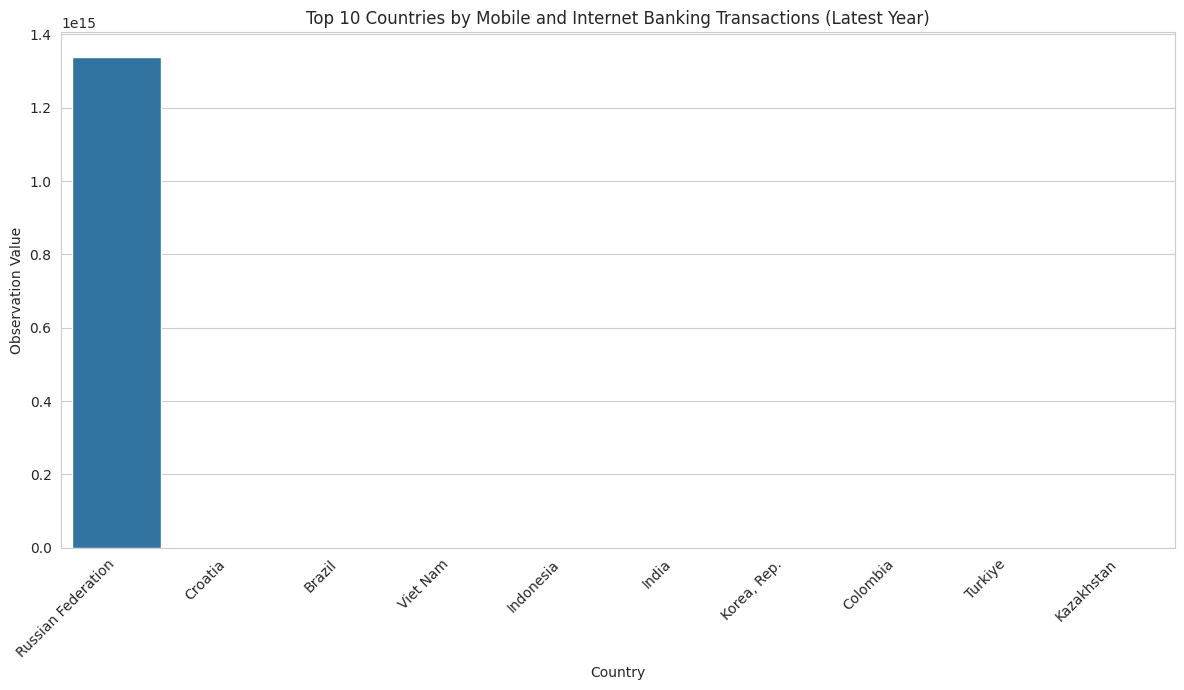

In [ ]:
# Visualization 1: Bar plot of OBS_VALUE for top countries (latest year)
plt.figure(figsize=(12, 7))
sns.barplot(x="REF_AREA_NAME", y="OBS_VALUE", data=df_country_summary.head(10))
plt.title("Top 10 Countries by Mobile and Internet Banking Transactions (Latest Year)")
plt.xlabel("Country")
plt.ylabel("Observation Value")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("top_10_countries_bar.png")
plt.show()

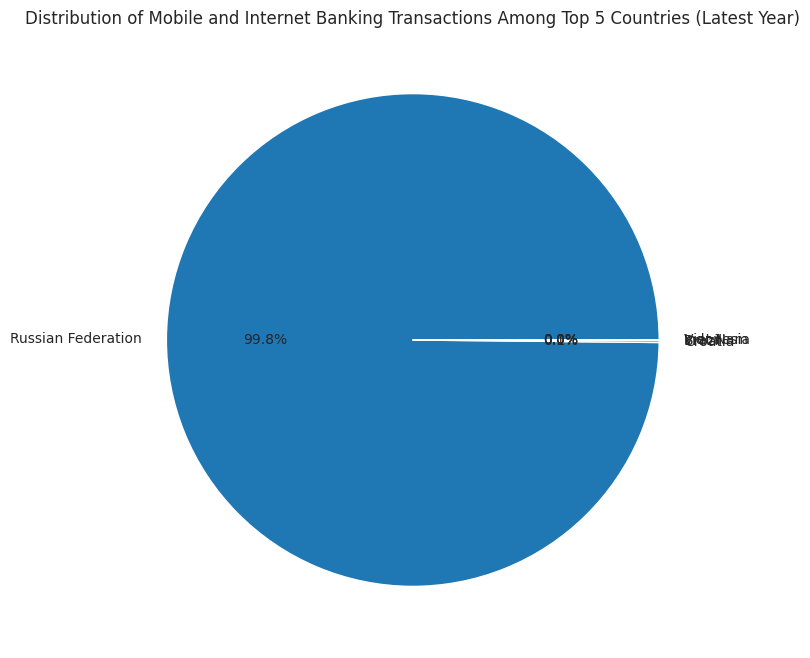

In [ ]:
# Visualization 2: Pie chart of OBS_VALUE for top 5 countries (latest year)
plt.figure(figsize=(8, 8))
df_country_summary_top5 = df_country_summary.head(5)
plt.pie(df_country_summary_top5["OBS_VALUE"], labels=df_country_summary_top5["REF_AREA_NAME"], autopct="%1.1f%%")
plt.title("Distribution of Mobile and Internet Banking Transactions Among Top 5 Countries (Latest Year)")
plt.savefig("top_5_countries_pie.png")
plt.show()

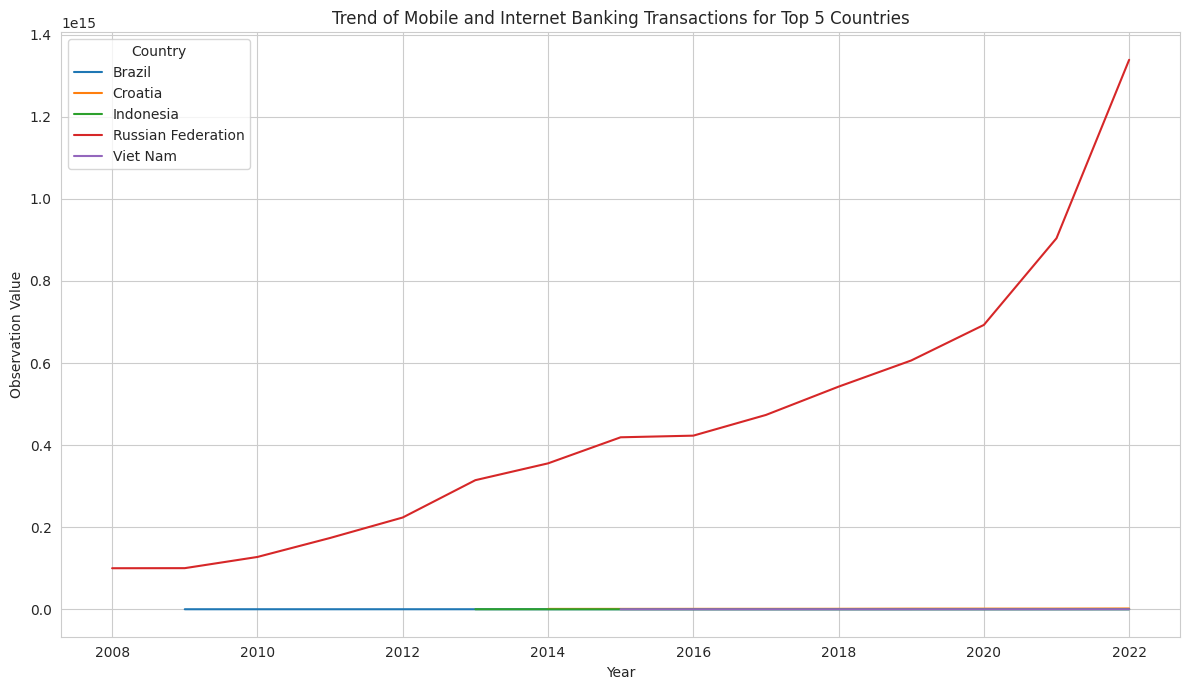

In [ ]:
# Visualization 3: Line plot of OBS_VALUE for top 5 countries over time
plt.figure(figsize=(12, 7))
sns.lineplot(x="TIME_PERIOD", y="OBS_VALUE", hue="REF_AREA_NAME", data=df_time_series_top_countries_grouped)
plt.title("Trend of Mobile and Internet Banking Transactions for Top 5 Countries")
plt.xlabel("Year")
plt.ylabel("Observation Value")
plt.legend(title="Country")
plt.tight_layout()
plt.savefig("top_5_countries_line.png")
plt.show()

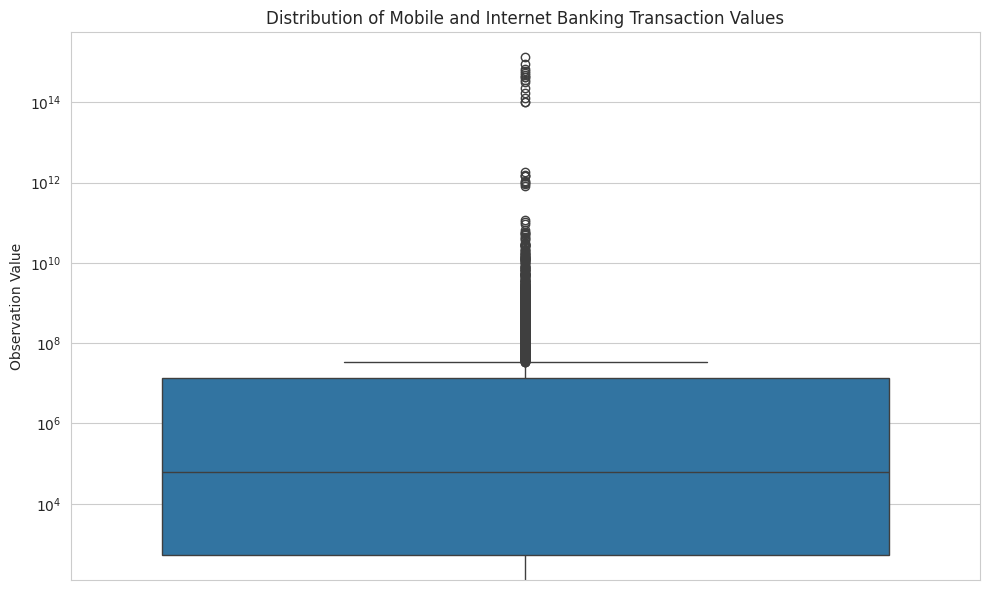

In [ ]:
# Visualization 4: Box plot of OBS_VALUE distribution
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_cleaned["OBS_VALUE"])
plt.title("Distribution of Mobile and Internet Banking Transaction Values")
plt.ylabel("Observation Value")
plt.yscale("log") # Use a log scale due to the wide range of values
plt.tight_layout()
plt.savefig("obs_value_boxplot.png")
plt.show()

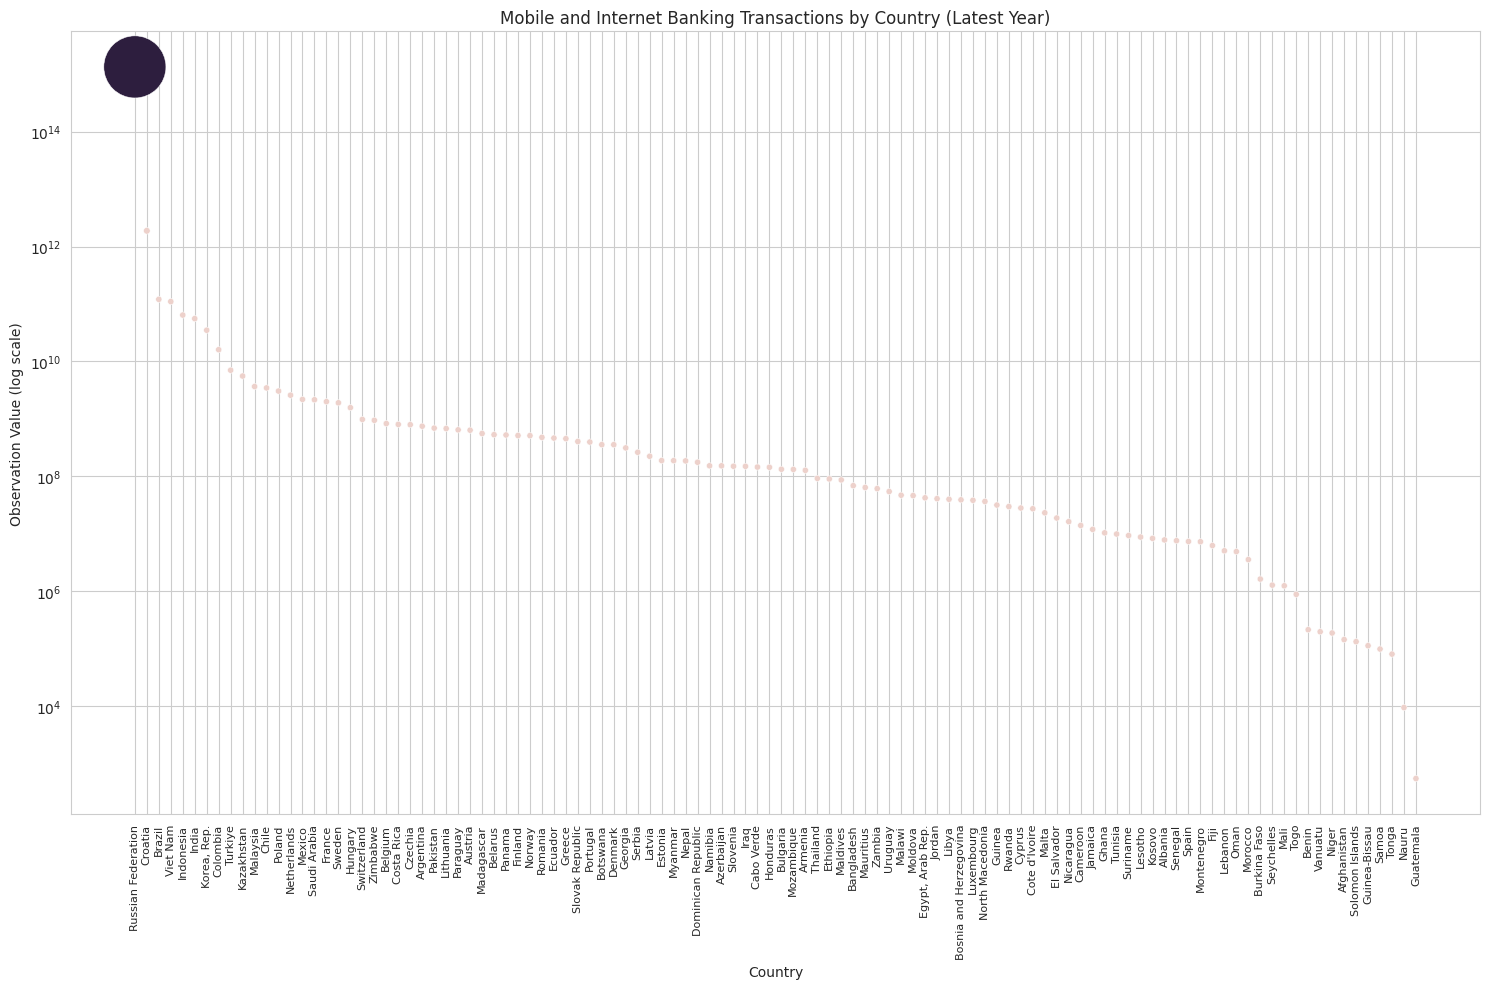

In [ ]:
# Visualization 5: World Map of OBS_VALUE (latest year) - Simplified scatter plot
plt.figure(figsize=(15, 10))
sns.scatterplot(x="REF_AREA_NAME", y="OBS_VALUE", data=df_country_summary, size="OBS_VALUE", hue="OBS_VALUE", sizes=(20, 2000), legend=False)
plt.title("Mobile and Internet Banking Transactions by Country (Latest Year)")
plt.xlabel("Country")
plt.ylabel("Observation Value (log scale)")
plt.xticks(rotation=90, fontsize=8)
plt.yscale("log")
plt.tight_layout()
plt.savefig("country_bubble_plot.png")
plt.show()

In [ ]:
print("All data processing and visualizations generated successfully.")

All data processing and visualizations generated successfully.


# Project 2: Analysis of Mobile and Internet Banking Transactions

## Introduction

This notebook presents an analysis of mobile and internet banking transactions across various countries, utilizing data from the International Monetary Fund (IMF).
As a Data Scientist, the goal is to gaiin insights from this dataset and present them through visualizations and explanations. This analysis aims to provide a comprehensive understanding of the trends and patterns in digital banking adoption.


## Problem Statement

The increasing adoption of mobile and internet banking is a significant trend in the global financial landscape. This project seeks to explore the available data to identify key countries leading in these transactions, understand the temporal evolution of these trends, and highlight any significant disparities or patterns that could inform financial policy and digital inclusion initiatives.


## Results and Discussion

### Data Cleaning and Preparation
Initially, the provided JSON file was identified as metadata. A subsequent CSV file, `IMF_FAS_FCMIBT.csv`, was used for the analysis. The data underwent a cleaning process to remove irrelevant columns and prepare it for visualization.


### Visualizations and Insights

#### 1. Top 10 Countries by Mobile and Internet Banking Transactions (Latest Year)

This bar plot showcases the top 10 countries with the highest volume of mobile and internet banking transactions in the latest available year. It highlights significant disparities in digital banking adoption and usage across different nations. Countries with higher transaction volumes may indicate more mature digital financial ecosystems, higher internet penetration, or successful digital inclusion policies. The dominance of a few countries suggests that there's still a large gap in digital banking adoption globally.

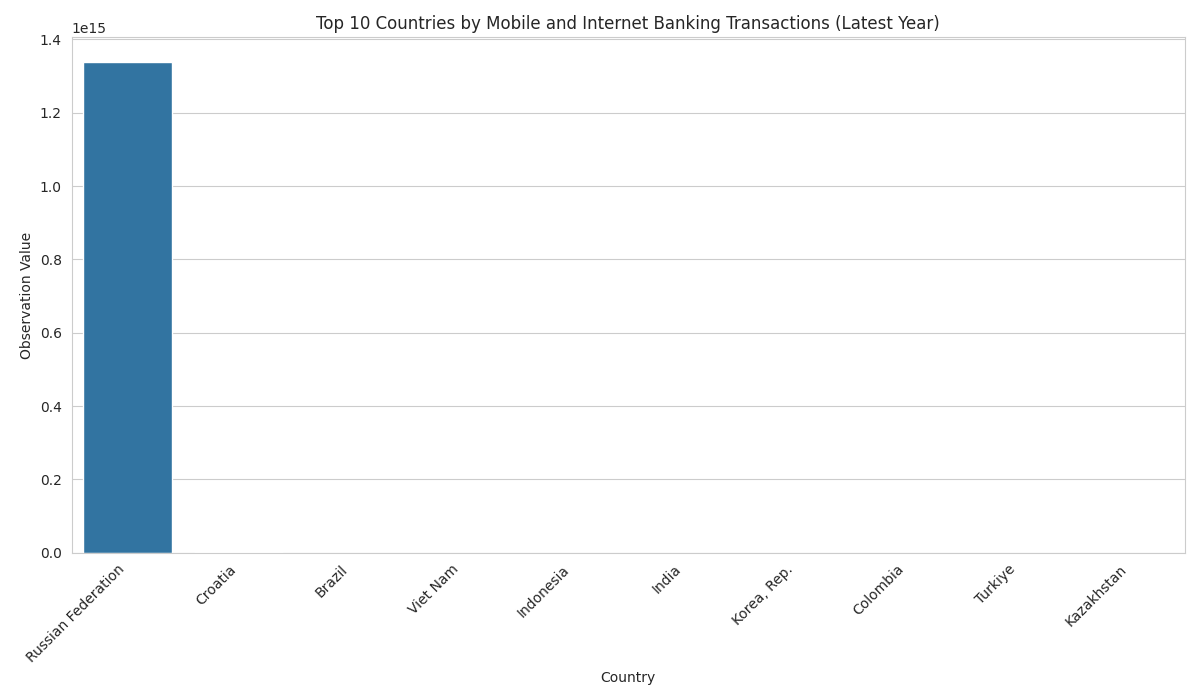


#### 2. Distribution of Mobile and Internet Banking Transactions Among Top 5 Countries (Latest Year)

This pie chart provides a proportional view of how the total mobile and internet banking transactions are distributed among the top 5 performing countries. It helps to quickly grasp the relative contribution of each leading nation to the overall digital banking landscape. A highly skewed distribution would indicate that a few countries are overwhelmingly driving the global figures, while a more even distribution would suggest broader regional or global adoption.

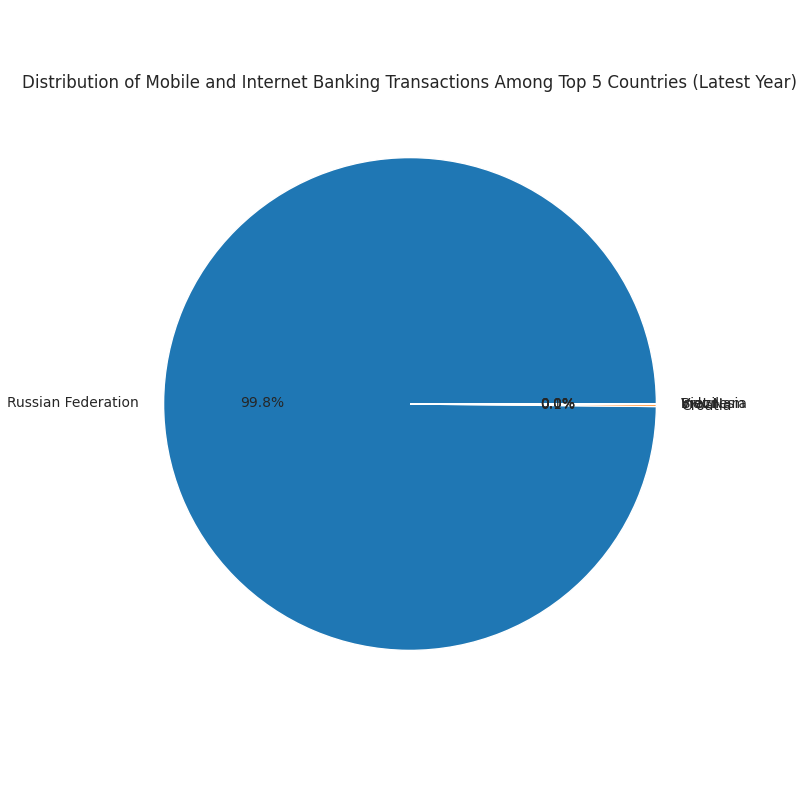


#### 3. Trend of Mobile and Internet Banking Transactions for Top 5 Countries

This line plot illustrates the trends of mobile and internet banking transactions for the top 5 countries over the years. It allows for the observation of growth, periods of rapid acceleration, or even stagnation in digital banking adoption. Analyzing these trends can reveal the impact of economic policies, technological advancements, or societal shifts on digital financial behavior. For instance, a steep upward curve might correlate with increased smartphone penetration or government initiatives promoting digital payments.

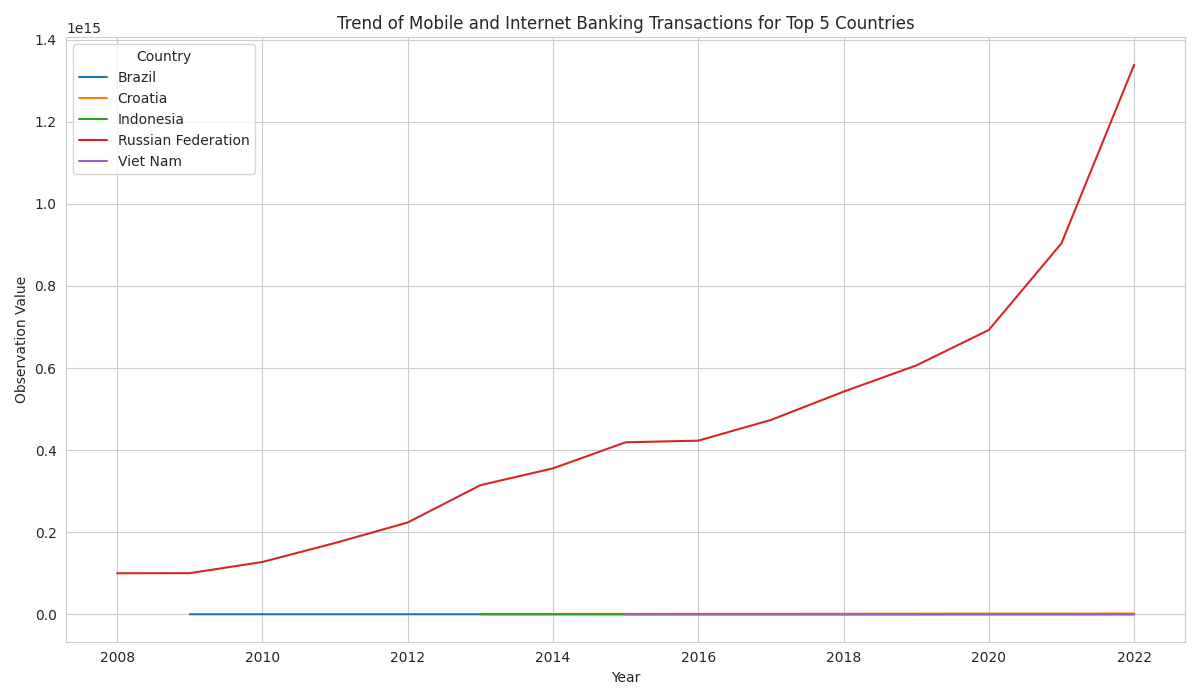

#### 4. Distribution of Mobile and Internet Banking Transaction Values

The box plot, with a logarithmic scale on the y-axis, visualizes the distribution of `OBS_VALUE` (transaction values) across all data points. The logarithmic scale is crucial here due to the wide range of transaction values, allowing for better visualization of the spread and outliers. This plot helps in understanding the central tendency, variability, and presence of extreme values in the transaction data. Outliers might represent exceptionally large transactions or data anomalies that warrant further investigation.

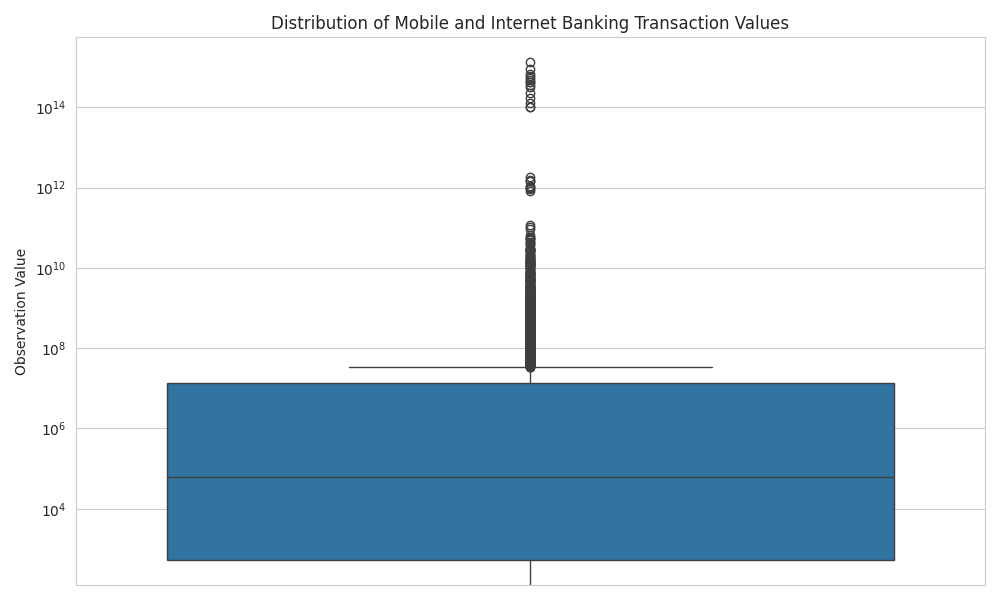

#### 5. Mobile and Internet Banking Transactions by Country (Latest Year)

This scatter plot, where the size and color of the points are mapped to the `OBS_VALUE`, provides a visual representation of mobile and internet banking transactions by country in the latest year. It allows for a quick comparison of transaction volumes across a wider range of countries than the top 10 bar plot. Countries with larger and darker points indicate higher transaction volumes, making it easy to identify major players at a glance. The logarithmic scale on the y-axis helps to accommodate the vast differences in transaction magnitudes.

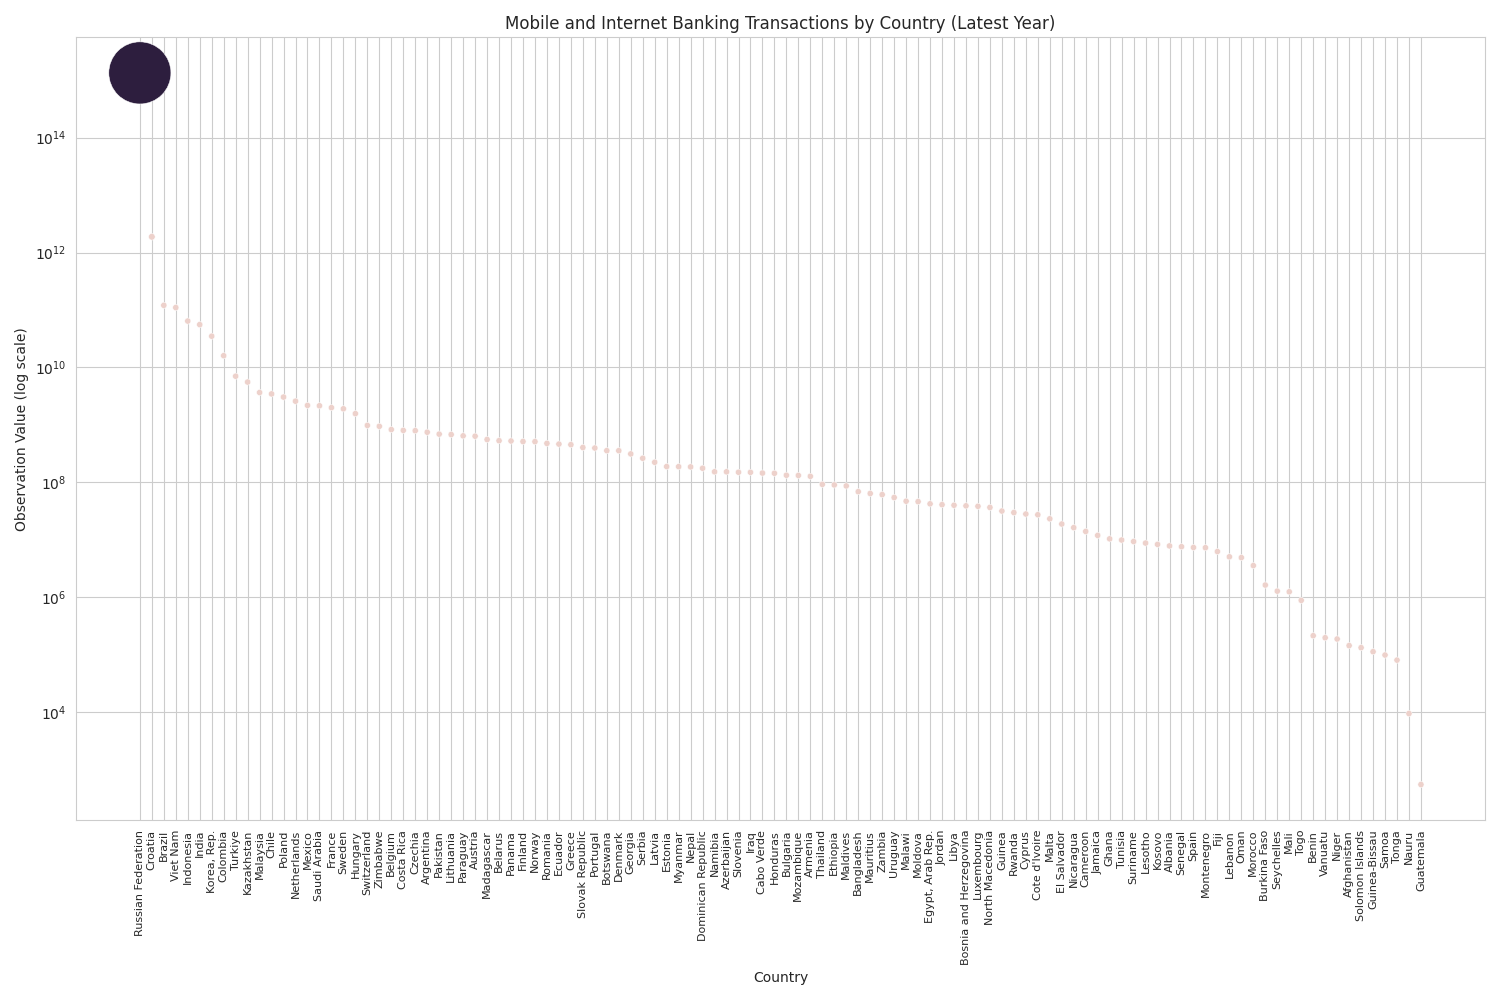

## Conclusion

This analysis has provided valuable insights into the landscape of mobile and internet banking transactions.

We observed significant variations in adoption rates across countries, with a few nations leading the charge.

The temporal analysis revealed growth trends, and the distribution plots highlighted the wide range of transaction values.

These findings underscore the dynamic nature of digital finance and the ongoing shift towards more accessible and efficient banking solutions.

Further research could delve into the specific drivers behind these trends in different regions and the socio-economic impacts of increased digital banking adoption.